In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from config import parse_proteins_in_file

import os 
os.getcwd()

'/home/selezov_su/notebooks/Promics/Panoram'

In [2]:
import gseapy as gp
from gseapy.plot import gseaplot

In [14]:
dt = parse_proteins_in_file("Data/whole_gene_set.txt")

In [3]:
dataset = pd.read_csv("Data/smears_imputed.csv", index_col=0, header=[0, 1, 2])

metadata = dataset.T.reset_index()["Condition"].to_list()
metadata

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia',
 'Pneumonia']

TypeError: stat: path should be string, bytes, os.PathLike or integer, not list

In [12]:
# simple plotting function
from gseapy import barplot, dotplot

inp = dataset.values

gs = gp.GSEA(
    data=pd.DataFrame(inp),
    gene_sets=['GO_Biological_process_2023'],
    classes = metadata, # cls=class_vector
    # set permutation_type to phenotype if samples >=15
    permutation_type='phenotype',
    permutation_num=1000, # reduce number to speed up test
    outdir=None,
    method='signal_to_noise',
)

gs.pheno_pos = "Healthy"
gs.pheno_neg = "Pneumonia"
gs.run()

2024-09-30 20:15:18,935 [WARNING] Found duplicated gene names, values averaged by gene names!
2024-09-30 20:15:19,851 [ERROR] No supported gene_sets: GO_Biological_process_2023


Exception: Error parsing gmt parameter for gene sets

In [10]:
pd.DataFrame(inp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,195500000.0,93152000.0,3568950.0,233460000.0,137740000.0,194400000.0,10630000.0,16958000.0,1106300.0,195280000.0,5036200.0,3399300.0,3886500.0,6790050.0,5150450.0,18616000.0,215290000.0,2201650.0,48074000.0,74612000.0
1,40405000.0,20849000.0,3568950.0,62054000.0,11477000.0,107990000.0,6760600.0,3337100.0,1106300.0,18673000.0,18519000.0,12737000.0,23081000.0,22440000.0,92781000.0,13559000.0,406250000.0,2201650.0,28003000.0,168060000.0
2,8193100.0,4024500.0,247420.0,15064000.0,11224000.0,7040700.0,10630000.0,687690.0,1106300.0,18946000.0,1586500.0,445100.0,2335300.0,1818000.0,4968300.0,1788300.0,14250000.0,201700.0,6804500.0,5069900.0
3,33250000.0,13066000.0,3568950.0,49565000.0,4308600.0,57598000.0,10417000.0,3337100.0,866840.0,4774800.0,9512000.0,1632800.0,3886500.0,5114400.0,11785000.0,1246200.0,28419000.0,2201650.0,6353100.0,20407000.0
4,16598000.0,14487000.0,3568950.0,17371000.0,10696000.0,16341000.0,5154900.0,1016300.0,1106300.0,5615700.0,5036200.0,3399300.0,3886500.0,6790050.0,657360.0,492560.0,29042000.0,2201650.0,242460.0,3050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,3131100.0,2395600.0,3568950.0,8413800.0,7620050.0,20468000.0,9957100.0,3337100.0,1106300.0,6659600.0,3100200.0,3399300.0,1392100.0,1758100.0,1410500.0,3129250.0,5360700.0,2201650.0,6629450.0,3918400.0
83,1016700.0,9546000.0,3568950.0,67493000.0,5993800.0,7336500.0,7167200.0,3337100.0,1106300.0,35720000.0,5036200.0,3399300.0,18783000.0,6790050.0,5150450.0,3129250.0,38520000.0,2201650.0,48723000.0,1116600.0
84,6420400.0,9546000.0,3568950.0,16080000.0,1821900.0,3222000.0,10630000.0,3337100.0,1106300.0,4314300.0,5036200.0,3399300.0,26468000.0,6790050.0,5150450.0,3129250.0,12873000.0,2201650.0,19271000.0,8579300.0
85,2708300.0,9546000.0,3568950.0,11360000.0,5903000.0,24753000.0,10630000.0,3337100.0,1106300.0,5879700.0,5036200.0,2658400.0,8115500.0,5062000.0,1344200.0,1079900.0,62193000.0,2201650.0,29677000.0,16519000.0


In [20]:
filepath = "Data/whole_gene_set.txt" 

with open(filepath, "r") as file:
    protein_set = file.read().splitlines()

In [21]:
enr2 = gp.enrich(
    gene_list=protein_set, # or gene_list=glist
    gene_sets=['GO_Biological_Process_2023'], # kegg is a dict object
    background=None, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
    outdir=None,
    verbose=True
)

2024-09-30 20:27:06,303 [INFO] Run: GO_Biological_Process_2023 
2024-09-30 20:27:08,166 [INFO] Done.


In [25]:
enr2.results.sort_values("Combined Score", ascending=False).head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Retina Homeostasis (GO:0001895),9/39,2.098260e-13,2.163306e-10,0,0,66.984270,1955.438138,IGHG3;PIGR;AZGP1;PIP;IGHA1;LYZ;ACTG1;CST4;LTF
38,GO_Biological_Process_2023,Cellular Heat Acclimation (GO:0070370),2/5,2.353803e-04,5.918954e-03,0,0,138.187500,1154.460936,HSPA6;HSPA1A
40,GO_Biological_Process_2023,Induction Of Bacterial Agglutination (GO:0043152),2/5,2.353803e-04,5.918954e-03,0,0,138.187500,1154.460936,FGB;FGA
39,GO_Biological_Process_2023,Heat Acclimation (GO:0010286),2/5,2.353803e-04,5.918954e-03,0,0,138.187500,1154.460936,HSPA6;HSPA1A
37,GO_Biological_Process_2023,Autocrine Signaling (GO:0035425),2/5,2.353803e-04,5.918954e-03,0,0,138.187500,1154.460936,SERPINB3;S100A9
4,GO_Biological_Process_2023,Glycolytic Process (GO:0006096),6/29,5.139585e-09,1.059782e-06,0,0,56.367675,1075.849984,GPI;LDHA;TPI1;PKM;ENO1;GAPDH
3,GO_Biological_Process_2023,Antibacterial Humoral Response (GO:0019731),8/49,9.494178e-11,2.447124e-08,0,0,43.059079,993.706964,FGB;IGHM;FGA;DEFA3;CTSG;IGHA1;IGKV3-20;LTF
44,GO_Biological_Process_2023,Negative Regulation Of Stress-Activated Protei...,2/6,3.519428e-04,8.063402e-03,0,0,103.635417,824.113162,GSTP1;PPIA
1,GO_Biological_Process_2023,Antimicrobial Humoral Response (GO:0019730),11/100,2.171585e-12,1.119452e-09,0,0,28.147101,755.906251,IGHM;DEFA3;PRTN3;CTSG;AZU1;LYZ;IGHA1;S100A9;GA...
52,GO_Biological_Process_2023,Leukocyte Aggregation (GO:0070486),2/7,4.911466e-04,9.377262e-03,0,0,82.904167,631.627603,S100A9;S100A8


In [ ]:
protein_set

In [7]:
dataset = pd.read_csv("Data/smears_imputed.csv", index_col=0, header=[0, 1, 2])

metadata = dataset.T.reset_index()["Condition"].to_list()

In [14]:
deps = pd.read_csv("Data/smears_deps.csv", index_col=0)#.astype(int)
deps

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Significance,-log10.padj
Protein IDs,,,,,,,,
A0A075B6P5,6.131684e+07,-2.601444,3.452643,-0.753464,0.451171,0.792080,Not significant,0.345659
Q99880,4.317112e+07,-0.326012,2.206110,-0.147777,0.882519,0.960717,Not significant,0.054276
O75592,4.718986e+06,-1.240002,1.679146,-0.738472,0.460228,0.792080,Not significant,0.337027
P00338,1.186123e+07,-2.168068,1.932333,-1.121995,0.261864,0.613886,Not significant,0.581923
P00450,4.981945e+06,-5.001960,2.772030,-1.804439,0.071162,0.613886,Not significant,1.147749
...,...,...,...,...,...,...,...,...
Q15365,3.062085e+06,-3.186719,3.250603,-0.980347,0.326915,0.669397,Not significant,0.485565
Q6P5S2,1.077292e+07,-0.229194,3.533841,-0.064857,0.948288,0.970866,Not significant,0.023060
Q8N4F0,4.174629e+06,1.373108,3.533841,0.388560,0.697602,0.922981,Not significant,0.156392


Setting fields to `None` to retrieve all available fields...
2024-09-30 21:30:32,275 [INFO] Parsing data files for GSEA.............................
2024-09-30 21:30:32,276 [INFO] Enrichr library gene sets already downloaded in: /home/selezov_su/.cache/gseapy, use local file
2024-09-30 21:30:32,345 [INFO] 6017 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-09-30 21:30:32,346 [INFO] 0019 gene_sets used for further statistical testing.....
2024-09-30 21:30:32,346 [INFO] Start to run GSEA...Might take a while..................
2024-09-30 21:30:32,370 [INFO] Congratulations. GSEApy runs successfully................



Fetched: 98 / 98


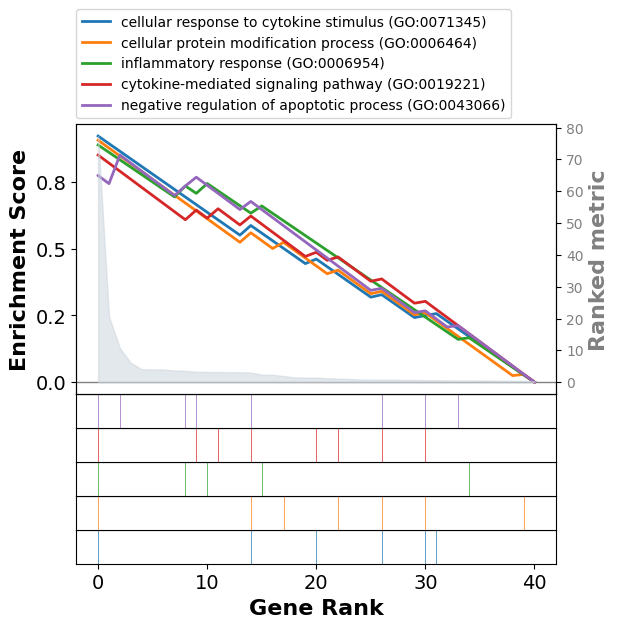

In [47]:
from UniProtMapper import ProtMapper

deps = pd.read_csv("Data/smears_deps.csv", index_col=0)

mapper = ProtMapper()

result, failed = mapper.get(
    ids=deps.index.to_list(), from_db="UniProtKB_AC-ID", to_db="Gene_Name"
)

deps = deps.loc[deps.padj < 0.25]
deps['Rank'] = deps["-log10.padj"]*deps.log2FoldChange.abs()
genes = result.drop_duplicates(["From"]).set_index("From").rename(columns={"To" : "Gene"})
deps = deps.merge(genes, left_index=True, right_index=True).reset_index(drop=True)

deps.to_csv("Data/smears_ranks.csv", index=True)

ranking = deps[['Gene', 'Rank']]
# pre_res = gp.prerank(rnk = ranking, gene_sets = 'GO_Biological_Process_2021', seed = 6, permutation_num = 1000)

pre_res = gp.prerank(
    rnk=ranking, # or rnk = rnk,
    gene_sets='GO_Biological_Process_2021',
    threads=4,
    min_size=5,
    max_size=1000,
    permutation_num=1000, # reduce number to speed up testing
    outdir=None, # don't write to disk
    seed=6,
    verbose=True, # see what's going on behind the scenes
)

terms = pre_res.res2d.Term

axs = pre_res.plot(
    terms=terms[:5],
    # legend_kws={'loc': (1.2, 0)}, # set the legend loc
    show_ranking=True, # whether to show the second yaxis
    figsize=(12, 2)
)
axs.figure.savefig("Plots/gsea.png", bbox_inches="tight", dpi=200)

In [34]:
deps

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Significance,-log10.padj,Rank,Gene
0,4.021980e+07,-1.429701,0.647994,-2.206348,0.027360,0.097002,Not significant,1.013218,-1.448598,IGKV2-28
1,2.935146e+07,1.953248,0.476004,4.103424,0.000041,0.000794,Significant,3.100286,6.055627,H2BC13
2,4.057267e+06,-0.785698,0.514695,-1.526531,0.126878,0.241377,Not significant,0.617304,-0.485015,MYCBP2
3,7.517038e+06,-0.196740,0.337151,-0.583539,0.559531,0.681928,Not significant,0.166261,-0.032710,LDHA
4,4.914607e+06,-0.355465,0.498731,-0.712738,0.476008,0.625398,Not significant,0.203843,-0.072459,CP
...,...,...,...,...,...,...,...,...,...,...
82,4.063583e+06,-0.317593,0.394025,-0.806023,0.420230,0.567178,Not significant,0.246280,-0.078217,PCBP1
83,1.038548e+07,0.420378,0.607700,0.691751,0.489094,0.625398,Not significant,0.203843,0.085691,LEG1
84,5.474854e+06,0.580971,0.345353,1.682253,0.092520,0.200460,Not significant,0.697973,0.405502,BPIFB2
85,7.046638e+06,0.866659,0.449828,1.926644,0.054024,0.145306,Not significant,0.837717,0.726015,BPIFB1


In [47]:
#this block is just me making a enriched set of genes in the DE upregulated genes
#not required for GSEA
import random

def a_thing(x):
    if x < 0:
        return 1
    else:
        return x
ranking['weights'] = ranking.Rank.map(a_thing)

a_list = random.choices(ranking.Gene.values, k = 100, weights = ranking.weights.values)

user_set = {'My Set' : a_list}

pre_res = gp.prerank(rnk = ranking, gene_sets = user_set, seed = 6)
gseaplot(pre_res.ranking, term = 'set_name1', **pre_res.results['set_name1']) #ofname = 'saved_fig.png'

2024-09-19 20:52:18,996 [WARNING] Input data contains NA, filled NA with 0
2024-09-19 20:52:19,000 [WARNING] Duplicated values found in preranked stats:
sample	ratio
Rank       0.00%
weights   86.21%
The order of those genes will be arbitrary, which may produce unexpected results.
2024-09-19 20:52:19,002 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

2024-09-19 20:52:19,003 [ERROR] The first entry of your gene_sets (gmt) look like this : { My Set: [DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX33, DHX

LookupError: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.
